# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv") # this is a pandas dataframe so methods for pandas work

In [ ]:
males_who_survived = df_titanic[(df_titanic["age"]<20) & (df_titanic["gender"]=="male")]
males_who_survived.head()

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [ ]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


In [ ]:
# Code here
df_titanic["type"] = df_titanic["class"].map({ # this is creating a new column type and maping variables to passanger in the type column
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger"
})

passenger_data = df_titanic[df_titanic['type'] == 'passenger']
crosstab_result = pd.crosstab(passenger_data['class'], passenger_data['embarked'])

print(crosstab_result)

df_titanic.head()

embarked  B    C    Q    S
class                     
1st       3  143    3  175
2nd       6   26    7  245
3rd       0  102  113  494


,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [ ]:
# Code 1 here
cond_dist_class_given_embarked = pd.crosstab(passenger_data['embarked'], passenger_data['class'], normalize='index') # https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
print(cond_dist_class_given_embarked)

passenger_data.groupby('embarked')['class'].value_counts() / passenger_data.groupby('embarked')['class'].count()
# so this is just like the conditional formula we learned P(A|B)
# Here we want the unique values of class from passanger data conditined on where they embarked over the total


class          1st       2nd       3rd
embarked                              
B         0.333333  0.666667  0.000000
C         0.527675  0.095941  0.376384
Q         0.024390  0.056911  0.918699
S         0.191466  0.268053  0.540481


embarked  class
B         2nd      0.666667
          1st      0.333333
C         1st      0.527675
          3rd      0.376384
          2nd      0.095941
Q         3rd      0.918699
          2nd      0.056911
          1st      0.024390
S         3rd      0.540481
          2nd      0.268053
          1st      0.191466
Name: class, dtype: float64

In [ ]:
# Code 2 here
cond_dist_class_given_embarked = pd.crosstab(passenger_data['embarked'], passenger_data['class'], normalize='columns') # https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
print(cond_dist_class_given_embarked)

passenger_data.groupby('class')['embarked'].value_counts() / passenger_data.groupby('class')['embarked'].count()
# Here we want the unique values of embarked given the class from passanger data over the total

class,embarked,1st,2nd,3rd
0,B,0.009259,0.021127,0.000000
1,C,0.441358,0.091549,0.143865
2,Q,0.009259,0.024648,0.159379
3,S,0.540123,0.862676,0.696756


Proportion of 3rd class passengers embarked at Southampton: 0.540481

Proportion of Southampton passengers were in 3rd class: 0.696756

```
# This is formatted as code
```



In [ ]:
s_first_class= df_titanic[(df_titanic["embarked"]=="S")& (df_titanic["class"]=="1st")]
count_1= len(s_first_class)
s_second_class= df_titanic[(df_titanic["embarked"]=="S")& (df_titanic["class"]=="2nd")]
count_2= len(s_second_class)
s_third_class= df_titanic[(df_titanic["embarked"]=="S")& (df_titanic["class"]=="3rd")]
count_3= len(s_third_class)
count_3

prop_3 = count_3/(count_1+count_2+count_3)
prop_3

0.5404814004376368

In [ ]:
len(passenger_data[(passenger_data["class"]=="3rd")&(passenger_data["embarked"]=="S")])/len(passenger_data[(passenger_data["embarked"]=="S")])
# here I am trying different way to subset my data to get the value I want
# so here we are trying to subset the data to find the subset of ones that are 3rd class and S embark and divide it by total of S embark

0.5404814004376368

In [ ]:
len(passenger_data[(passenger_data["class"]=="3rd")&(passenger_data["embarked"]=="S")])/len(passenger_data[(passenger_data["class"]=="3rd")])
# here we do they same thing

0.6967559943582511

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

### Pros of the Visualization:

1. **Visual Clarity:**
    - The visualization offers a clear and immediate understanding of the distribution of passengers across classes based on their embarkation point. This makes it easier for viewers to grasp the general trend without having to delve into specific numerical values.
    
2. **Quick Comparisons:**
    - The side-by-side bar charts allow for easy comparison between embarkation points for each passenger class.
    
3. **Intuitive Layout:**
    - The use of colors and the layout makes it evident to distinguish between different classes, enhancing the user experience.

### Cons of the Visualization:

1. **Lack of Exact Values:**
    - While the visualization gives a good general overview, it doesn't provide specific numerical values. This makes it difficult to accurately determine proportions or percentages, especially for finer details.
    
2. **Potential for Misinterpretation:**
    - Without exact numbers, there's room for misinterpretation. For instance, slight differences between bars might be overlooked, leading to incorrect conclusions.
    
3. **Limited Scope:**
    - The visualization is focused on the relationship between embarkation point and passenger class. If someone wants to understand other facets of the data, like survival rates within these groups or the correlation with other variables, this visualization wouldn't be of help.


In [ ]:
# first we need to make contigency table into a frame

df = cond_dist_class_given_embarked.reset_index()
df = df.rename(columns={"index": "Embarked"})
df


In [ ]:
# Compute the conditional distribution which we already did above
conditional_distribution = passenger_data.groupby('class')['embarked'].value_counts() / passenger_data.groupby('class')['embarked'].count()

# Now we reset the multi-index series(which only gives us rows) to a dataframe
df = conditional_distribution.reset_index(name='probability')
df
# reset_index() will turn these indices into regular columns but the new one doesn't have one so we name it

# Pivot the dataframe to get the desired format
# df_pivot = df.pivot(index='embarked', columns='class', values='probability') # index means rows in python
# df_pivot

,class,embarked,probability
0,1st,S,0.540123
1,1st,C,0.441358
2,1st,B,0.009259
3,1st,Q,0.009259
4,2nd,S,0.862676
5,2nd,C,0.091549
6,2nd,Q,0.024648
7,2nd,B,0.021127
8,3rd,S,0.696756
9,3rd,Q,0.159379


<ipython-input-83-d58f7fa12f74>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



[Text(0.5, 0, 'Embarking Port'),
 Text(0, 0.5, 'Probability of class, given where they embarked'),
 Text(0.5, 1.0, 'Distribution of Passenger Class Given Embarkation Port')]

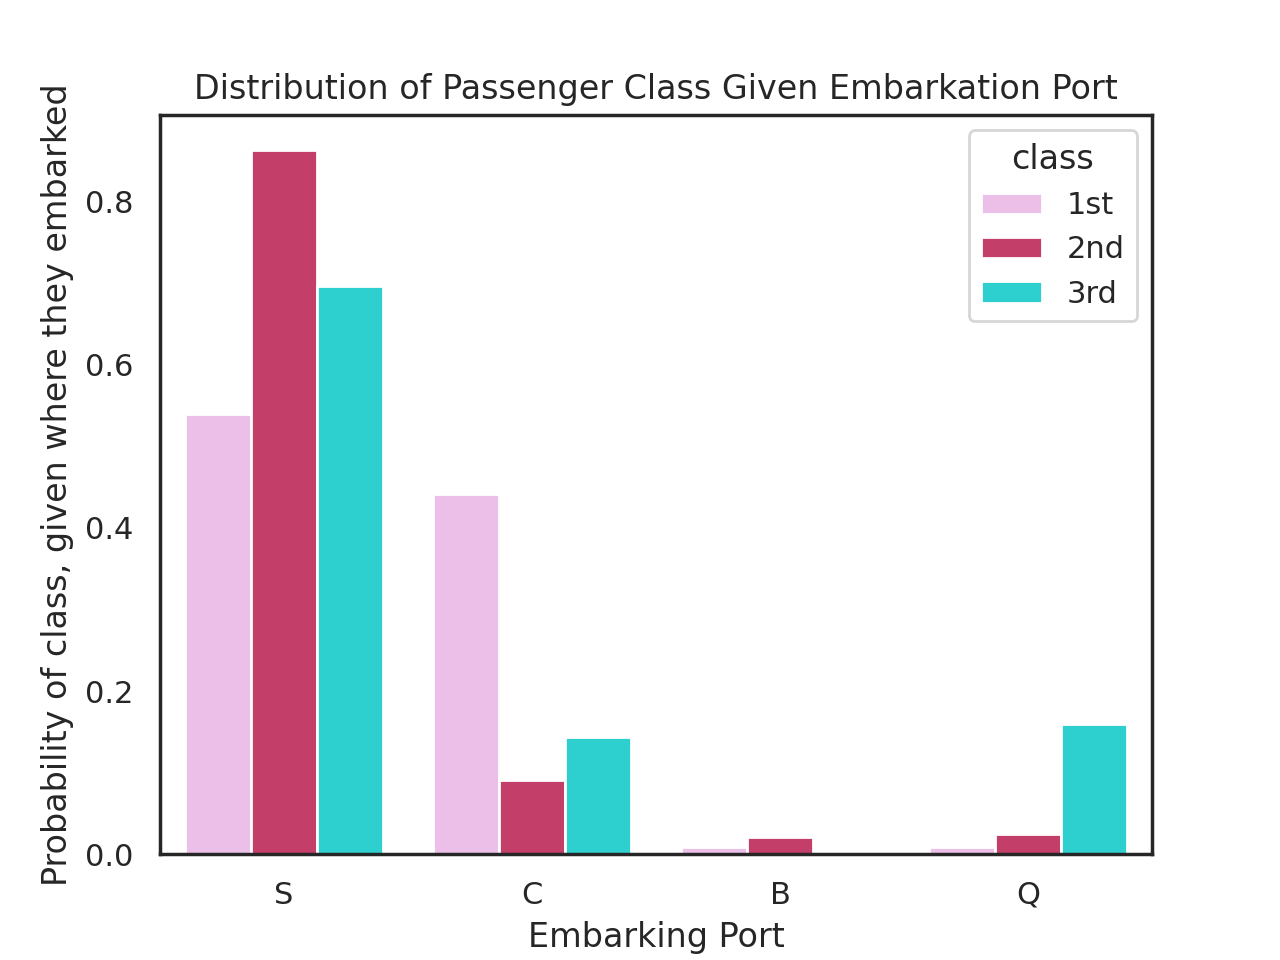

In [ ]:
import seaborn as sns

colors = ["#F3B8EE", "#DB2763", "#12EAEA"] # choose the colors
sns.set_palette(sns.color_palette(colors)) # this is gonna map the colors to the hue
plot = sns.barplot(data=df, x="embarked", y="probability", hue="class", ci=None)
plot.set(xlabel='Embarking Port',
       ylabel='Probability of class, given where they embarked',
       title='Distribution of Passenger Class Given Embarkation Port')